In [2]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)         # Should print your CUDA version, e.g


True
12.1


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import Data
from torch_geometric import utils
from environment_manager import *
name = "240318-initial parsing"
env = load_create_environment(name)
GHComponentTable.initialise()

Setting environment variables
Copying vanilla components
File copied successfully from C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\Grasshopper Components\240318-VanillaComponents\vanilla_components.csv to ExtractionEnvironments\240318-initial parsing\00-VanillaComponents\vanilla_components.csv.
Copying components
Copying gh files


In [65]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

def plot_graph_by_category(graph):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Get the unique categories
    categories = set(nx.get_node_attributes(graph, 'category').values())

    # Create a color map based on the number of categories
    num_colors = len(categories)
    color_map = plt.cm.get_cmap('viridis', num_colors)

    # Create a dictionary mapping categories to colors
    category_colors = {}
    for i, category in enumerate(categories):
        category_colors[category] = mcolors.to_hex(color_map(i))

    # Create a dictionary of node positions
    pos = nx.get_node_attributes(graph, 'pos')
    if not pos:  # If 'pos' attribute is not available, use 'x' and 'y' attributes
        pos = {node_id: (data['x'], data['y']) for node_id, data in graph.nodes(data=True)}

    # Create a list of colors based on the node categories
    node_colors = [category_colors[graph.nodes[node].get('category', '')] for node in graph.nodes()]

    # Draw the graph
    nx.draw(graph, pos=pos, with_labels=False, node_size=10, node_color=node_colors, edge_color='gray', arrows=True, ax=ax)

    # Create a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category,
                                  markerfacecolor=color, markersize=8)
                       for category, color in category_colors.items()]
    ax.legend(handles=legend_elements, title='Categories', loc='upper right')

    # Show the plot
    plt.axis('equal')
    plt.show()

In [72]:
import os
import networkx as nx

graph_folder = r'C:\Users\jossi\Dropbox\Office_Work\Jos\GH_Graph_Learning\ExtractionEnvironments\240318-initial parsing\05-GraphML'
# Initialize an empty list to store dictionaries
data_list = []


# Create a new graph to store the combined graph
combined_graph = nx.DiGraph()
graph_data = []
for i, file in enumerate(os.listdir(graph_folder)):
    if file.endswith('.graphml'):
        G = nx.read_graphml(os.path.join(graph_folder, file))
        # Skip files with no nodes to avoid division by zero
        if G.number_of_nodes() < 5:
            continue
        if G.number_of_edges() == 0:
            continue
        graph_data.append(G)
        combined_graph.add_nodes_from(G.nodes(data=True))
        combined_graph.add_edges_from(G.edges(data=True))

    

In [73]:
print(nx.number_weakly_connected_components(combined_graph))


6304


In [69]:
d = utils.from_networkx(combined_graph)
d['edge_index']

tensor([[   0,    0,    1,  ..., 6278, 6279, 6280],
        [   1,    2,    0,  ..., 6275, 6277, 6277]])

In [55]:
# Create a lookup table for all the nodes
"""we need to reorder the graphs because the node indices are not unique across the graphs and pytorch will order their indicies according to each node index"""
node_lookup = {}
node_counter = 0
for i, graph in enumerate(graph_data):
    for node in graph.nodes():
        if node not in node_lookup:
            node_lookup[node] = node_counter
            node_counter += 1

reordered_graphs = []
for graph in graph_data:
    reordered_graph = nx.relabel_nodes(graph, {node: node_lookup[node] for node in graph.nodes()})
    reordered_graphs.append(reordered_graph)



In [61]:
d = utils.from_networkx(reordered_graphs)

AttributeError: 'list' object has no attribute 'is_directed'

In [ ]:
# verify that the graph nodes are unique


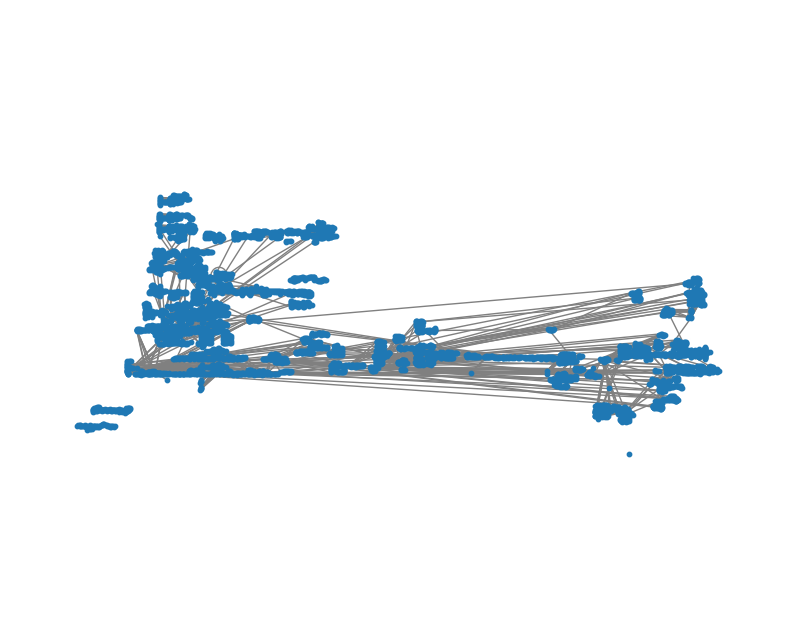

In [39]:
# def visualize_graphs(graph_data, spacing=10):
#     # Create a new graph to store the combined graph with translated positions
#     combined_graph = nx.Graph()
# 
#     # Translate the nodes of each graph to distinct positions
#     for i, graph in enumerate(graph_data[:10]):
#         # Calculate the translation offset for the current graph
#         offset_x = i * spacing
#         offset_y = i * spacing
# 
#         # Create a dictionary to store the translated positions
#         pos = {}
# 
#         # Iterate over the nodes and update their positions
#         for node, data in graph.nodes(data=True):
#             x = data.get('x', 0) + offset_x
#             y = data.get('y', 0) + offset_y
#             pos[node] = (x, y)
# 
#         # Add the translated nodes and edges to the combined graph
#         combined_graph.add_nodes_from(graph.nodes(data=True))
#         combined_graph.add_edges_from(graph.edges(data=True))
# 
#         # Set the updated positions for the nodes in the combined graph
#         nx.set_node_attributes(combined_graph, pos, 'pos')
# 
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(10, 8))
# 
#     # Draw the combined graph with the translated positions
#     nx.draw(combined_graph, pos=nx.get_node_attributes(combined_graph, 'pos'), with_labels=False,
#             node_size=10, edge_color='gray', arrows=True, ax=ax)
# 
#     # Show the plot
#     plt.axis('equal')
#     plt.show()
# visualize_graphs(graph_data, spacing=2000)

C:\Users\jossi\AppData\Local\Temp\ipykernel_34956\3657603454.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', num_colors)


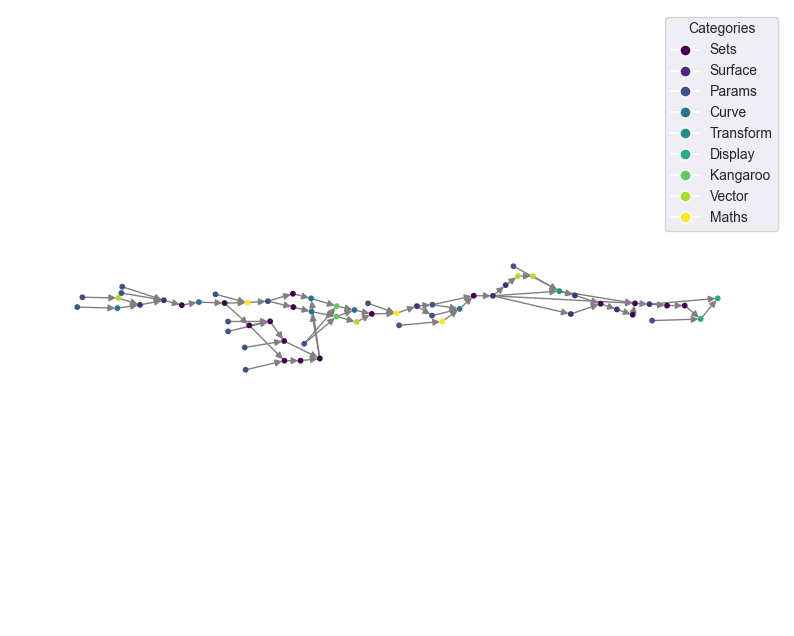

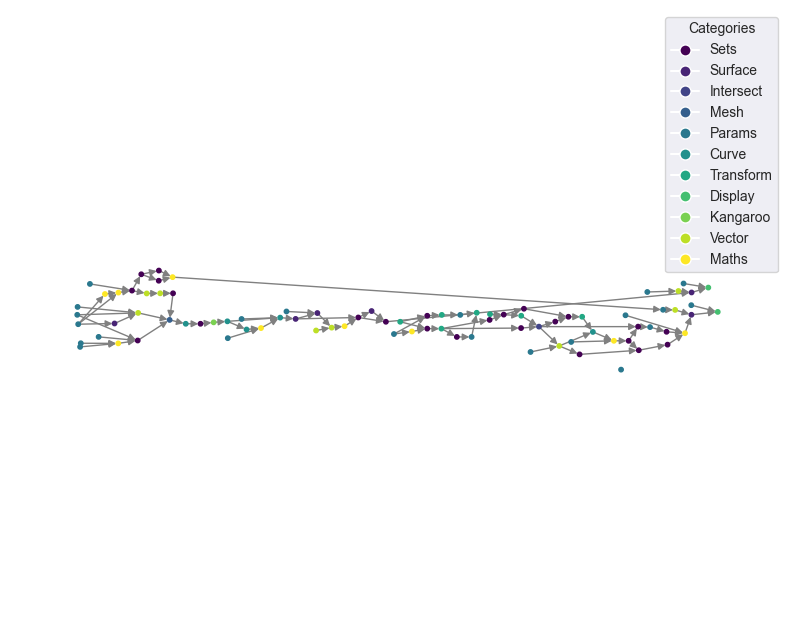

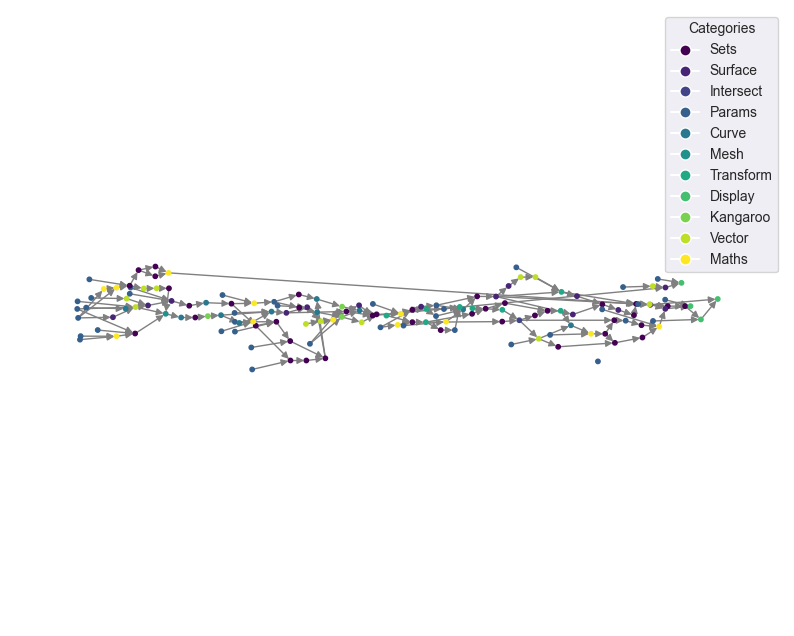

In [37]:
# combined_graph = nx.compose_all(graph_data[:2])
# for graph in graph_data[:2]:
#     plot_graph_by_category(graph)
# plot_graph_by_category(combined_graph)

In [32]:
print(len(combined_graph))
print(combined_graph.number_of_nodes())
print(nx.number_connected_components(combined_graph))


78
78
7


In [40]:
data = [utils.from_networkx(G) for G in graph_data]
data[0]['edge_index']

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 11, 12, 12, 13, 13, 14,
         15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 28, 29, 30,
         31, 31, 32, 33, 33, 34, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 43, 43,
         43, 44, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 55, 56, 58, 59,
         60],
        [ 1,  3,  0,  6,  1,  4,  9,  3,  3, 10, 11, 12, 13, 17, 19, 15, 16, 11,
         24, 26, 18, 22, 37, 17, 17, 24, 26, 18, 25, 28, 30, 27, 28, 29, 32, 29,
         25, 27, 33, 34, 35, 39, 40, 39, 19, 22, 32, 40, 43, 39, 41, 44, 45, 46,
         47, 48, 47, 49, 52, 55, 52, 50, 44, 44, 53, 54, 47, 56, 57, 58, 59, 57,
         59]])

In [13]:
# import System
# # import Counter 
# from collections import Counter

# guids = [v for d in data for v in d['guid']]
# counter = Counter(guids)
# tops = counter.most_common(1000)
# names = []
# categories = []
# counts = []
# for t, c in tops:
#     name = GHComponentTable.search_component_by_guid(System.Guid(t)).Desc.Name
#     names.append(name)
#     category = GHComponentTable.search_component_by_guid(System.Guid(t)).Desc.Category
#     categories.append(category)
#     counts.append(c)
# # components = [GHComponentTable.search_component_by_guid(System.Guid(g)) for g in guids]
# # components

In [6]:
plot = False
if plot:
    # Set the font size globally
    plt.rcParams.update({'font.size': 5})  
    plt.figure(figsize=(10,200))
    
    x = counts
    y = [f"{categories[i]}:{name}" for i, name in enumerate(names)]
    sns.barplot(x=x, y=y)


array([ 0,  1,  1,  0,  1, -1,  2,  1,  1,  0,  1,  3,  1,  1,  1,  3,  2,
        2, -1, -1,  3,  2,  1,  1, -1, -1, -1,  0, -1,  0,  1, -1,  0,  1,
        5,  2,  1,  2, -1, -1,  2,  0, -1, -1, -1, -1,  1,  3, -1,  1,  1,
        2,  0, -1,  0,  0,  2,  2,  1, -1, -1, -1,  1,  2,  2,  0,  2,  2,
       -1,  1,  5,  4, -1,  0,  4,  0,  2, -1,  2, -1,  0,  1,  1, -1,  2,
        1,  1,  0, -1,  2, -1, -1, -1,  1,  2,  1,  1,  0,  0,  2,  5, -1,
        0,  1,  0,  4,  2,  1, -1,  1,  1,  3,  2,  1,  1,  1, -1,  2,  0,
        0,  2,  2, -1,  1,  2, -1, -1,  2,  0,  1, -1,  2,  2,  2,  1,  2,
        2,  1, -1,  3,  0,  0, -1,  2,  2,  1,  0, -1,  2,  1,  2, -1, -1,
        0,  1, -1,  2,  2,  1,  4,  2,  3,  0,  0,  1,  4,  2,  3,  2,  2,
       -1, -1, -1,  2,  3,  3, -1, -1,  1,  2,  1,  0,  2, -1, -1, -1,  0,
        2,  1, -1,  3,  0,  2,  2,  2, -1, -1,  2,  1,  5], dtype=int64)